<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages</a></span></li><li><span><a href="#Read-input-images" data-toc-modified-id="Read-input-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read input images</a></span></li><li><span><a href="#Pre-process-images" data-toc-modified-id="Pre-process-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-process images</a></span></li></ul></div>

## Import packages

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import shutil

In [3]:
import keras

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
from glob import glob

In [5]:
%matplotlib inline

In [6]:
import os

## Read input images

In [7]:
path_input_images=r'/Users/shyamravikumar/Documents/Box Sync/Final Project - Image Detection/03 Defect Images/Organized'
path_output_images=r'/Users/shyamravikumar/Documents/Workspace/BAI - Project/Input Files'

In [8]:
path_input_images_defective = os.path.join(path_input_images,"Defective")
path_input_images_not_defective = os.path.join(path_input_images,"Not Defective")

assert(os.path.exists(path_input_images_defective))
assert(os.path.exists(path_input_images_not_defective))

In [35]:
# List all images across the folders. Then, remove all the files that have "_meta" is present in the name

list_images_defective = glob(os.path.join(path_input_images_defective,"**","*.JPG"),recursive=True)
list_images_defective=list(filter(lambda x: "_meta" not in x,list_images_defective))
len(list_images_defective)

21

In [41]:
#Same for non-defective images
list_images_not_defective = glob(os.path.join(path_input_images_not_defective,"**","*.JPG"),recursive=True)
list_images_not_defective=list(filter(lambda x: "_meta" not in x,list_images_not_defective))
len(list_images_not_defective)

86

In [26]:
# Create backup copies

path_output_images_defective = os.path.join(path_output_images,'Defective')
path_output_images_not_defective = os.path.join(path_output_images,'Not Defective')

In [33]:
# Copy defective images
for i in range(len(list_images_defective)):
    dir_name=os.path.split(os.path.split(list_images_defective[i])[0])[1]
    dir_name

    output_filename= dir_name+' - '+os.path.basename(list_images_defective[i])
    output_filename

    path_output = os.path.join(path_output_images_defective,output_filename)
    path_output

    shutil.copyfile(list_images_defective[i],path_output)

In [42]:
# Copy non-defective images
for i in range(len(list_images_not_defective)):
    dir_name=os.path.split(os.path.split(list_images_not_defective[i])[0])[1]
    dir_name

    output_filename= dir_name+' - '+os.path.basename(list_images_not_defective[i])
    output_filename

    path_output = os.path.join(path_output_images_not_defective,output_filename)
    path_output

    shutil.copyfile(list_images_not_defective[i],path_output)

Manual Task - Create test/train split of the images

## Pre-process images

In [9]:
path_input_train = r'/Users/shyamravikumar/Documents/Workspace/BAI - Project/Input Files/train'
path_input_test = r'/Users/shyamravikumar/Documents/Workspace/BAI - Project/Input Files/test'

Rescale images

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
BATCH_SIZE = 4

In [18]:
train_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(path_input_train,
                              target_size = (1920,1080),
                              batch_size = BATCH_SIZE,
                              class_mode = 'binary')

Found 67 images belonging to 2 classes.


In [19]:
train_data.class_indices

{'Defective': 0, 'Not Defective': 1}

In [20]:
train_data.n

67

In [21]:
train_data.image_shape

(1920, 1080, 3)

In [22]:
X_batch, y_batch = next(train_data)

In [23]:
X_batch.shape

(4, 1920, 1080, 3)

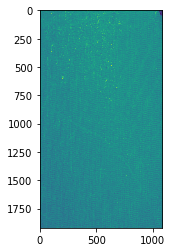

In [24]:
plt.imshow(np.array(X_batch[3])[:,:,1])

In [25]:
y_batch[1]

1.0

In [26]:
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(path_input_test,
                              target_size = (1920,1080),
                              batch_size = BATCH_SIZE,
                              class_mode = 'binary')

Found 40 images belonging to 2 classes.


Model 1

In [27]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout

In [28]:
model_v1 = Sequential()

# Layer 1
model_v1.add(Conv2D(filters = 8,
                    kernel_size = (3,3),
                    input_shape = train_data.image_shape))
model_v1.add(MaxPool2D(pool_size=(2,2)))

# Layer 2
model_v1.add(Conv2D(filters = 4,
                    kernel_size = (3,3)))
model_v1.add(MaxPool2D(pool_size=(2,2)))

## Flatten
model_v1.add(Flatten())

# Layer 3
model_v1.add(Dense(32))
model_v1.add(Activation('relu'))
#model_v1.add(Dropout(0.1))

# Layer 4
model_v1.add(Dense(16))
model_v1.add(Activation('relu'))
#model_v1.add(Dropout(0.1))

# Layer 3
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1918, 1078, 8)     224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 959, 539, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 957, 537, 4)       292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 478, 268, 4)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512416)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16397344  
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
__________

In [30]:
### Compile the model

In [126]:
model_v1.compile(optimizer='adam',
                 loss='binary_crossentropy',             
                 metrics = ['accuracy'])

In [127]:
EPOCHS = 10

In [ ]:
history_v1 = model_v1.fit_generator(train_data,
                                    epochs=EPOCHS,
                                    steps_per_epoch=train_data.n/BATCH_SIZE,
                                    validation_steps=test_data.n/BATCH_SIZE,
                                    validation_data=test_data)

Epoch 1/10
17/16 [==============================] - 266s 16s/step - loss: 4.2623 - acc: 0.7351 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 2/10
17/16 [==============================] - 416s 24s/step - loss: 3.9889 - acc: 0.7498 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 3/10
17/16 [==============================] - 463s 27s/step - loss: 3.8281 - acc: 0.7599 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 4/10
17/16 [==============================] - 369s 22s/step - loss: 3.8281 - acc: 0.7599 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 5/10
17/16 [==============================] - 377s 22s/step - loss: 4.0627 - acc: 0.7452 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 6/10
17/16 [==============================] - 439s 26s/step - loss: 4.2235 - acc: 0.7351 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 7/10
17/16 [==============================] - 385s 23s/step - loss: 4.2973 - acc: 0.7304 - val_loss: 1.5942 - val_acc: 0.9000
Epoch 8/10
10/16 [================>.............] - ETA: 1:53 - loss: 5.1813

In [ ]:
model_v1.predict_on_batch(test_Data)